In [1]:
## Reference
# https://mubaris.com/posts/linear-regression/

#http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

In [2]:
## LIBRARIES

import numpy as np
import pandas as pd
import math
import random
from collections import Counter
from numpy.linalg import inv


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
## LOAD DATA
data = pd.read_csv('spambase_data.txt', sep = ",",header=None)

for col in data.iloc[:,:-1]:
    stdev = np.std(data[col])
    col_mean = data[col].mean()
    #print(col)
    for i in range(len(data)):
        data.iloc[i,col] = (data[col][i] - col_mean)/stdev
        
#     #data[col] = col
    

x0 = np.ones(len(data))
data['b'] = pd.Series(x0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [4]:
##K-FOLDS

k = 5
fold_size = math.ceil(len(data) / k)
dataset_split = list()
ind_count = 0
for i in range(k):
    #print(i)
    dataset_split.append(data.iloc[ind_count:ind_count+fold_size,:])
    ind_count = ind_count + fold_size + 1
    
def create_train_test(train_ind, test_ind):
    train = pd.DataFrame()
    test = pd.DataFrame()
    for i in train_ind:
        train = train.append(dataset_split[i])
    #for i in test_ind:
    test = test.append(dataset_split[test_ind])
    return(train, test)

In [18]:
def init_lin_reg(k, train_ind, test_ind, iterations, alpha):
    print("Epoch " + str(k+1))
    
    train,test = create_train_test(train_ind, test_ind)

    train_x = train.iloc[:,0:57]
    train_y = train.iloc[:,57]
    
    test_x = test.iloc[:,0:57]
    test_y = test.iloc[:,57]
    print(sum(test_y))
    
    Y = np.array(train_y, dtype=np.float64)
    X = np.array(train_x, dtype=np.float64)
    
    Y_test = np.array(test_y)
    X_test = np.array(test_x)
    
    weights = np.zeros(57)
    
    past_costs = []
    past_thetas = [weights]
    
    for i in range(iterations):
        prediction = X.dot(weights)
        error = prediction - Y
        cost = np.dot(error.T, error)
        past_costs.append(cost)

        weights = weights - (alpha * np.dot(X.T, error))
        past_thetas.append(weights)
        
         
    Y_pred = np.dot(X, weights)
    #print('Train MSE: ' + str(mse(Y, Y_pred)))
    
    test_pred = np.dot(X_test, weights)
    #test_mse = mse(Y_test, test_pred)
    #print('Test MSE: ' + str(test_mse))
    tp,fp,tn,fn = accuracy(Y, Y_pred, .65)
    print ("Train Accuracy: " + str((tp+tn)/(tp+tn+fp+fn)))
    
    tp,fp,tn,fn = accuracy(Y_test, test_pred, .65)
    print ("Test Accuracy: " + str((tp+tn)/(tp+tn+fp+fn)))

    roc_auc(Y_test, test_pred)
    #print(tp)
    
    #return(test_mse)
    return tp,fp,tn,fn
         
    #return past_weights, past_costs

In [19]:
def roc_auc(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    print(fpr)
    print(tpr)

    # method I: plt
    #import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# Model Evaluation - RMSE
def mse(Y, Y_pred):
    mse = sum((Y - Y_pred) ** 2) / len(Y)
    return mse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def accuracy(Y, Y_pred, threshold):   
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(Y)):
        if(Y[i] == 1 and Y_pred[i] >= threshold):
            #print(Y[i])
            tp += 1
        elif(Y[i] == 1 and Y_pred[i] < threshold):
            #print(Y[i])
            fn += 1
        elif(Y[i] == 0 and Y_pred[i] < threshold):
            tn += 1
        elif(Y[i] == 0 and Y_pred[i] >= threshold):
            fp += 1

    return tp,fp,tn,fn

Epoch 1
921
Train Accuracy: 0.7690424374319913
Test Accuracy: 0.051031487513572206
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[0.00108578 0.05537459 0.05754615 0.07926167 0.08143322 0.09446254
 0.09663409 0.10206298 0.10423453 0.10640608 0.10966341 0.11074919
 0.11292074 0.12920738 0.13137894 0.13897937 0.1422367  0.1465798
 0.14875136 0.15743757 0.15960912 0.20304017 0.20521173 0.22366992
 0.22692725 0.23669924 0.23995657 0.2432139  0.24538545 0.31813246
 0.32030402 0.36373507 0.36590662 0.36807818 0.37024973 0.41693811
 0.41910966 0.44299674 0.4451683  0.46036916 0.46254072 0.55266015
 0.55591748 0.55917481 0.56134636 0.56351792 0.56568947 0.60694897
 0.6091

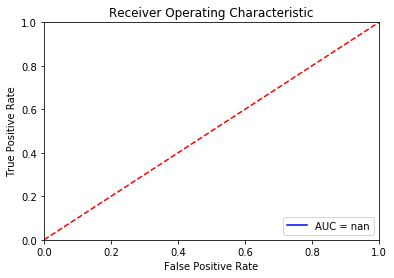

Epoch 2
891
Train Accuracy: 0.765233949945593
Test Accuracy: 0.08686210640608034
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0

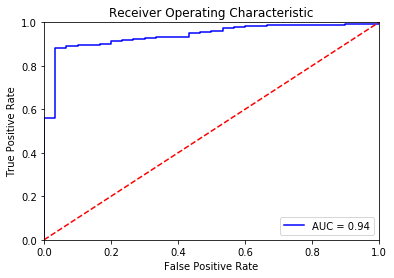

Epoch 3
0
Train Accuracy: 0.6060935799782372
Test Accuracy: 0.998914223669924
[0.         0.00108578 0.00760043 0.00977199 0.01737242 0.02171553
 0.02497286 0.02714441 0.06948969 0.07166124 0.11074919 0.11292074
 0.12595005 0.12812161 0.14983713 0.15200869 0.19978284 0.2019544
 0.21606949 0.21824104 0.25950054 0.26384365 0.28990228 0.29315961
 0.32790445 0.330076   0.33116178 0.33333333 0.3485342  0.35070575
 0.38219327 0.38436482 0.41368078 0.41585233 0.68729642 0.68946797
 0.7155266  0.71769815 0.74267101 0.74484256 0.77198697 0.77741585
 0.82627579 0.82844734 0.83713355 0.8393051  0.84256243 0.85559175
 0.8577633  0.86970684 0.87187839 0.87513572 0.87730727 0.90228013
 0.90445168 0.92833876 0.93051031 0.94896851 0.95222584 0.95656895
 0.9587405  0.96091205 0.96525516 0.96634093 0.96851249 0.97828447
 0.98045603 0.98805646 0.99022801 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan na

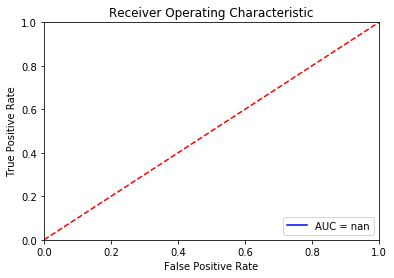

Epoch 4
0
Train Accuracy: 0.6196953210010882
Test Accuracy: 0.991313789359392
[0.         0.00108578 0.00651466 0.00868621 0.01954397 0.02497286
 0.04885993 0.05103149 0.08034745 0.08469055 0.3029316  0.30618893
 0.31596091 0.31813246 0.32247557 0.32356135 0.3257329  0.330076
 0.33224756 0.33659066 0.33767644 0.34636265 0.35722041 0.3713355
 0.37350706 0.41693811 0.41910966 0.51248643 0.51465798 0.70575461
 0.70792617 0.82193268 0.82410423 0.82736156 0.834962   0.83713355
 0.84256243 0.84473398 0.84799131 0.85016287 0.85233442 0.85450597
 0.86536374 0.86753529 0.9359392  0.94136808 0.94571118 0.94788274
 0.94896851 0.95114007 0.96199783 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


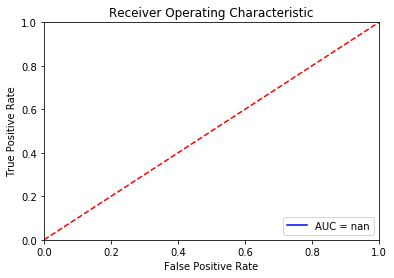

Epoch 5
0
Train Accuracy: 0.6145494028230185
Test Accuracy: 0.9879518072289156
[0.         0.00109529 0.03833516 0.04052574 0.11171961 0.11500548
 0.39539978 0.39868565 0.40635268 0.40854326 0.41292442 0.52464403
 0.52683461 0.82584885 0.82803943 0.84884995 0.85104053 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


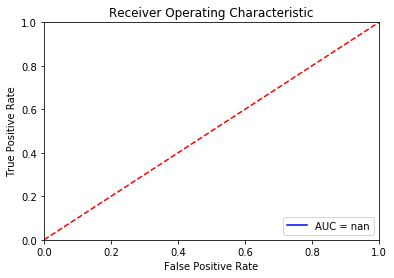

In [20]:
#LOOCV
total_mse = 0
alpha = .0000001 #Step size
iterations = 25000 #No. of iterations
error_table = pd.DataFrame(columns=["tp", "fp", "tn", "fn"])#, "acc"])

for i in range(k):
    test_ind = i
    train_ind = [x for x in range(k) if x!=i]
    #print(train_ind)
    #total_mse += init_lin_reg(i, train_ind, test_ind, iterations, alpha)
    tp, fp, tn, fn = init_lin_reg(i, train_ind, test_ind, iterations, alpha)
    error_table = error_table.append({
     "tp": tp,
     "fp": fp,
     "tn": tn,
     "fn": fn
     #"acc": (tp+tn)/(tp+fp+fn+tn)
      }, ignore_index=True)

#print("Average Test MSE: " + str(total_mse/k))

In [10]:
#Confusion Matrix
conf_mat = pd.DataFrame(columns=["tp", "fp", "tn", "fn"])
conf_mat = conf_mat.append({
 "tp": error_table['tp'].sum(),
 "fp": error_table['fp'].sum(),
 "tn": error_table['tn'].sum(),
 "fn": error_table['fn'].sum()
 #"acc": (tp+tn)/(tp+fp+fn+tn)
  }, ignore_index=True)
conf_mat

,tp,fp,tn,fn
0,97,20,2765,1715
